<a href="https://colab.research.google.com/github/ShahdTarek/Tweets-Sentiment-Analysis-of-hatred-speech/blob/main/Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d arkhoshghalb/twitter-sentiment-analysis-hatred-speech

twitter-sentiment-analysis-hatred-speech.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 files		    sample_data
'kaggle (1).json'   sentiment.hdf5
'kaggle (2).json'   twitter-sentiment-analysis-hatred-speech.zip
 kaggle.json


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('twitter-sentiment-analysis-hatred-speech.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
train_data = pd.read_csv("/content/files/train.csv")
#test_data = pd.read_csv("/content/files/test.csv")


In [ ]:
train_data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
print(train_data.isnull().sum())

id       0
label    0
tweet    0
dtype: int64


In [ ]:
tweets = train_data['tweet'].tolist()
labels = train_data['label'].values

In [ ]:
print(tweets[:5])
#print(labels)

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run', "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked", '  bihday your majesty', '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ', ' factsguide: society now    #motivation']


In [ ]:
#check data balance

print('positive reviews: {}'.format((train_data['label']==0).sum()))
print('Negative reviews: {}'.format((train_data['label']==1).sum()))

positive reviews: 29720
Negative reviews: 2242


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
nltk.download('words')

import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
english_words = set(nltk.corpus.words.words())

In [ ]:
from collections import Counter
def preprocess(text):
     ###Remove stop and meaningless words
    text = text.lower()
    new_text = ""
    for word in text.split():
        if word in english_words and word not in stop_words and word.isalpha():
            new_text = new_text + " " + word
    ###Replace punctuation with tokkens
    new_text = new_text.replace('.', ' <PERIOD> ')
    new_text = new_text.replace(',', ' <COMMA> ')
    new_text = new_text.replace('"', ' <QUOTATION_MARK> ')
    new_text = new_text.replace(';', ' <SEMICOLON> ')
    new_text = new_text.replace('!', ' <EXCLAMATION_MARK> ')
    new_text = new_text.replace('?', ' <QUESTION_MARK> ')
    new_text = new_text.replace('(', ' <LEFT_PAREN> ')
    new_text = new_text.replace(')', ' <RIGHT_PAREN> ')
    new_text = new_text.replace('--', ' <HYPHENS> ')
    new_text = new_text.replace('?', ' <QUESTION_MARK> ')
    new_text = new_text.replace('#', ' ')
    ####lematize
    lem_text=''
    for word in new_text.split():
      lem_text = lem_text + " " + lem.lemmatize(word)
    return lem_text



In [ ]:
data = []
for sent in range(len(tweets)):
  x = preprocess(tweets[sent])
  data.append(x)

In [ ]:
data[:5]

[' father selfish',
 ' thanks credit use cause offer',
 ' majesty',
 ' love u take u time',
 ' society']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokens = Tokenizer(oov_token='<OOV>')
tokens.fit_on_texts(data)

In [ ]:
word_index = tokens.word_index
word_index

{'<OOV>': 1,
 'day': 2,
 'u': 3,
 'happy': 4,
 'love': 5,
 'time': 6,
 'like': 7,
 'get': 8,
 'new': 9,
 'good': 10,
 'see': 11,
 'people': 12,
 'one': 13,
 'go': 14,
 'want': 15,
 'take': 16,
 'need': 17,
 'today': 18,
 'make': 19,
 'got': 20,
 'bull': 21,
 'life': 22,
 'going': 23,
 'way': 24,
 'thankful': 25,
 'first': 26,
 'great': 27,
 'best': 28,
 'really': 29,
 'wait': 30,
 'come': 31,
 'know': 32,
 'back': 33,
 'never': 34,
 'think': 35,
 'feel': 36,
 'work': 37,
 'even': 38,
 'last': 39,
 'much': 40,
 'still': 41,
 'always': 42,
 'next': 43,
 'right': 44,
 'finally': 45,
 'find': 46,
 'week': 47,
 'thank': 48,
 'many': 49,
 'via': 50,
 'morning': 51,
 'look': 52,
 'looking': 53,
 'tomorrow': 54,
 'sad': 55,
 'getting': 56,
 'thanks': 57,
 'little': 58,
 'world': 59,
 'would': 60,
 'night': 61,
 'ready': 62,
 'another': 63,
 'year': 64,
 'old': 65,
 'live': 66,
 'bear': 67,
 'whatever': 68,
 'every': 69,
 'weekend': 70,
 'might': 71,
 'watch': 72,
 'made': 73,
 'polar': 74,
 's

In [ ]:
data_num = tokens.texts_to_sequences(data)
data_num

[[181, 2513],
 [57, 1297, 189, 289, 802],
 [2170],
 [5, 3, 16, 3, 6],
 [1097],
 [479, 494, 3681, 104, 296, 2171, 132, 8],
 [54],
 [43, 159, 64, 64, 35],
 [5],
 [344],
 [1204, 701, 837, 446, 82],
 [],
 [8, 11, 529],
 [728, 159, 2966],
 [],
 [],
 [25],
 [],
 [96, 50, 19, 12],
 [838, 73],
 [12, 1759, 1400, 4872, 1145, 868, 387, 172, 111, 839, 655, 4873, 362],
 [55, 58],
 [778, 4, 86, 676, 6, 233, 729],
 [2967, 1205],
 [],
 [78, 513, 1298],
 [],
 [27, 1945, 4874, 595, 464],
 [4, 2],
 [12, 234, 10, 61, 12, 138, 447],
 [34, 596, 419, 1098, 1099, 112, 2514],
 [],
 [427, 987, 494, 172, 447, 656, 2968, 730],
 [175, 428, 1760, 4875, 1206],
 [1531, 2172, 17, 121, 7],
 [21, 99, 21, 97, 68, 15, 367],
 [],
 [13, 297],
 [448, 1146],
 [25],
 [45, 576, 209, 200],
 [494, 1207, 494, 803, 96],
 [22, 410, 1401],
 [11, 70],
 [161],
 [],
 [5, 3, 16, 3, 6],
 [14],
 [76, 545],
 [28, 168, 22, 655],
 [56, 62, 1299],
 [20, 5],
 [4876, 26],
 [87],
 [48, 210, 5],
 [4877, 4878, 1532, 677, 2515],
 [577],
 [4],
 [2173

In [ ]:
data_padded = pad_sequences(data_num, padding="pre", truncating='pre')

# Need this block to get it to work with TensorFlow

data_padded = np.array(data_padded)
data_padded

array([[   0,    0,    0, ...,    0,  181, 2513],
       [   0,    0,    0, ...,  189,  289,  802],
       [   0,    0,    0, ...,    0,    0, 2170],
       ...,
       [   0,    0,    0, ...,   51,   37,   55],
       [   0,    0,    0, ...,    0,    0,  291],
       [   0,    0,    0, ...,    0,   48,  106]], dtype=int32)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
vocab_size = max(list(tokens.word_index.values()))+1
out_size = 300
lstm_size = 64

In [ ]:

model = Sequential()

model.add(Embedding(vocab_size, out_size))
#model.add(Dropout(0.5))

model.add(LSTM(lstm_size, dropout=0.5, recurrent_dropout=0.2))
model.add(Dropout(0.5))

model.add(Dense(1, activation='softmax'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 300)         2343600   
                                                                 
 lstm_3 (LSTM)               (None, 64)                93440     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,437,105
Trainable params: 2,437,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
early = EarlyStopping(monitor='val_loss',
                      patience=5,
                      mode='min',
                      restore_best_weights=True,
                      verbose=1)
checkpointer = ModelCheckpoint(filepath='sentiment.hdf5',
                               verbose=1,
                               save_best_only=True)
reduce_learning = ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    factor=0.5,
    verbose=1,
    min_lr=0.00001)

In [ ]:
history = model.fit(data_padded,
                    labels,
                    epochs=50,
                    batch_size=200,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[checkpointer, reduce_learning, early])


Epoch 1/50
128/128 [==============================] - ETA: 0s - loss: 0.2709 - accuracy: 0.0703
Epoch 1: val_loss improved from inf to 0.20753, saving model to sentiment.hdf5
128/128 [==============================] - 13s 85ms/step - loss: 0.2709 - accuracy: 0.0703 - val_loss: 0.2075 - val_accuracy: 0.0695 - lr: 0.0010
Epoch 2/50
128/128 [==============================] - ETA: 0s - loss: 0.1758 - accuracy: 0.0703
Epoch 2: val_loss improved from 0.20753 to 0.18357, saving model to sentiment.hdf5
128/128 [==============================] - 10s 79ms/step - loss: 0.1758 - accuracy: 0.0703 - val_loss: 0.1836 - val_accuracy: 0.0695 - lr: 0.0010
Epoch 3/50
128/128 [==============================] - ETA: 0s - loss: 0.1391 - accuracy: 0.0703
Epoch 3: val_loss did not improve from 0.18357
128/128 [==============================] - 10s 78ms/step - loss: 0.1391 - accuracy: 0.0703 - val_loss: 0.1877 - val_accuracy: 0.0695 - lr: 0.0010
Epoch 4/50
128/128 [==============================] - ETA: 0s - l

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


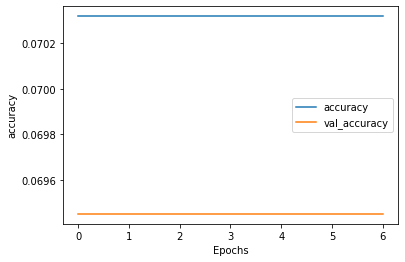

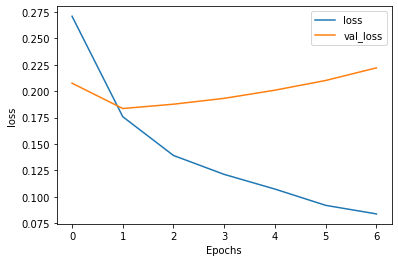

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
